# Quadratic LIF 

In [2]:
from brian2 import *
from neurodynex.tools import input_factory
%matplotlib inline

## Comparing Linear LIF and Quadratic LIF 

Mathematically, the difference between a linear LIF and a quadratic LIF is the equation that governs its behaviour.

**The equation that governs linear LIF is**:\
if not in refractory state:
$$ \tau.\frac{du}{dt} = -(u - u_{rest}) + RI_{ext}$$
if threshold is reached:
$$ u = u_{reset}$$
$$ refractory\  state = True $$

**The equation that governs quadratic LIF is**:\
if not in refractory state:
$$ \tau.\frac{du}{dt} = a_{o}(u - u_{rest})(u - u_{c}) + RI_{ext}$$
if threshold is reached:
$$ u = u_{reset}$$
$$ refractory\  state = True $$ 

Here, $u_{c}$ is a constant voltage and $a_{o}$ is a constant. Rest of the terms carry the same meaning as the linear model that was taught in the class and the implications are: 
- $a_{o} > 0$ 
- $u_{c} > u_{rest}$

## Step Current as the Input

In the current simulations we set $\tau$ as 10ms, refratory period as 5 milli seconds, amplitude as 0.1 nano amps, resistance as 10 Mega ohms, voltage threshold (for the model to spike) as 0.8 milli volts, resting voltage as 0.05  milli volts and reset voltage of value -0.05 milli volts.

We run this simulation for 0.1 * seconds 

### Linear LIF 

Spike times: [18.8 38.6 58.4 78.2 98. ] ms


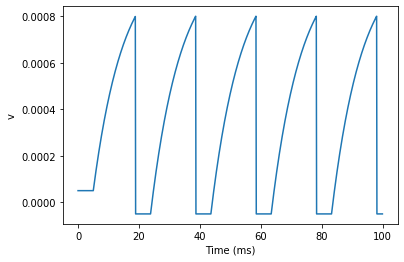

In [3]:
#Linear LIF 
start_scope()
tau = 10*ms
step_current = input_factory.get_step_current(
    t_start=5, t_end=100, unit_time= ms,
    amplitude= 0.1*namp)  # set i_min to your value
v_rest = 0.05*mV
res = 10*Mohm
eqs = '''
dv/dt = -((v- v_rest) - res*step_current(t,i))/tau : volt (unless refractory)
'''
G = NeuronGroup(1, eqs, threshold='v > 0.8 * mV', reset='v = -0.05 *mV', refractory=5*ms, method='linear')
G.v = v_rest

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G) 
run(0.1*second)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');
print('Spike times: %s' % spikemon.t[:])

### Quadratic LIF
In addition to the above settings we have to choose the value of $u_{c}$ and $a_{o}$. 

#### Effect of the constant '$a_{o}$'
Here, we set the value $u_{c}$ as 0.06 milli volts and analyse the role the value of a plays in the quadratic LIF. We initially set the value of $a_{o}$ as 100/(mV). 

Spike times: [ 8.6 19.6 30.6 41.6 52.6 63.6 74.6 85.6 96.6] ms


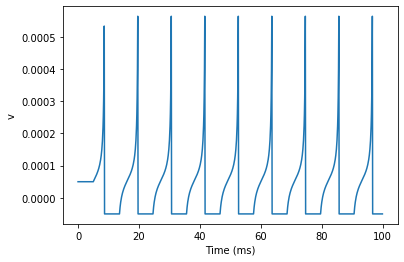

In [4]:
#Quadratic LIF 
# ---- Effect of 'a' when 'a' is big ---- #
start_scope()
tau = 10*ms
a = 100/(mV)
step_current = input_factory.get_step_current(
    t_start=5, t_end=100, unit_time=ms,
    amplitude= 0.02*namp)
v_rest = 0.05*mV
v_c = 0.06*mV
res = 10*Mohm
eqs = '''
dv/dt = ((v- v_rest)*quad + res*step_current(t,i))/tau : volt (unless refractory)
quad = a*(v- v_c) : 1 
'''
G = NeuronGroup(1, eqs, threshold='v > 0.8 * mV', reset='v = -0.05 *mV', refractory=5*ms, method='rk2')
G.v = v_rest

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G) 
run(0.1*second)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');
print('Spike times: %s' % spikemon.t[:])

 We change the value of $a_{o}$ to 0.01/(mV) below

Spike times: [42.1 89.2] ms


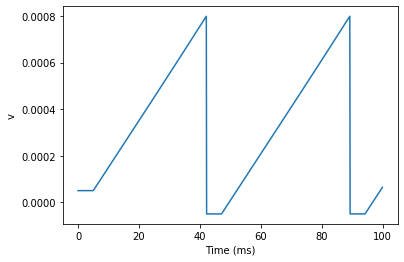

In [5]:
#Quadratic LIF 
# ---- Effect of 'a' in the equation when 'a' is small. ---- #
start_scope()
tau = 10*ms
a = 0.01/(mV)
step_current = input_factory.get_step_current(
    t_start=5, t_end=100, unit_time=ms,
    amplitude= 0.02*namp)
v_rest = 0.05*mV
v_c = 0.06*mV
res = 10*Mohm
eqs = '''
dv/dt = ((v- v_rest)*quad + res*step_current(t,i))/tau : volt (unless refractory)
quad = a*(v- v_c) : 1 
'''
G = NeuronGroup(1, eqs, threshold='v > 0.8 * mV', reset='v = -0.05 *mV', refractory=5*ms, method='rk2')
G.v = v_rest

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G) 
run(0.1*second)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');
print('Spike times: %s' % spikemon.t[:])

#### Effect of u_c:
Here, we set $a_{o}$ as 1/(mV) and keep it constant while we explore the role $u_{c}$ plays.\
NOTE: amplitude is changed to 0.003 nano amps so that the effect of $u_{c}$ becomes clear.  

We initially set the value of $u_{c}$ as 1* mV (a value that that's very big when compared to $u_{c}$ and is higher than the threshold voltage) 

Spike times: [] s


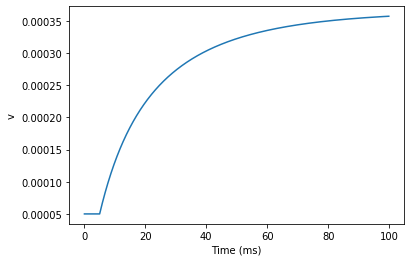

In [6]:
#Quadratic LIF 
# ---- Checking Effective threshold ---- #
# I_min is 0.03 namp #
start_scope()
tau = 10*ms
a = 1/(mV)
step_current = input_factory.get_step_current(
    t_start=5, t_end=100, unit_time=ms,
    amplitude= 0.02*namp)
v_rest = 0.05*mV
v_c = 1*mV
res = 10*Mohm
eqs = '''
dv/dt = ((v- v_rest)*quad + res*step_current(t,i))/tau : volt (unless refractory)
quad = a*(v- v_c) : 1 
'''
G = NeuronGroup(1, eqs, threshold='v > 0.8 * mV', reset='v = -0.05 *mV', refractory=5*ms, method='rk2')
G.v = v_rest

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G) 
run(0.1*second)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');
print('Spike times: %s' % spikemon.t[:])

We changed the value of $u_{c}$ to be 0.8 * mV which is equal to the threshold voltage.

Spike times: [86.6] ms


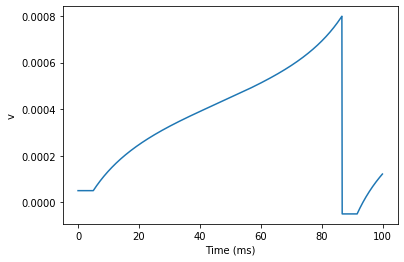

In [7]:
#Quadratic LIF 
# ---- Checking Effective threshold ---- #
start_scope()
tau = 10*ms
a = 1/(mV)
step_current = input_factory.get_step_current(
    t_start=5, t_end=100, unit_time=ms,
    amplitude= 0.02*namp)
v_rest = 0.05*mV
v_c = 0.8*mV
res = 10*Mohm
eqs = '''
dv/dt = ((v- v_rest)*quad + res*step_current(t,i))/tau : volt (unless refractory)
quad = a*(v- v_c) : 1 
'''
G = NeuronGroup(1, eqs, threshold='v > 0.8 * mV', reset='v = -0.05 *mV', refractory=5*ms, method='rk2')
G.v = v_rest

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G) 
run(0.1*second)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');
print('Spike times: %s' % spikemon.t[:])

We change $u_{c}$ to be very close to $u_{rest}$ in the below simulation 

Spike times: [48.] ms


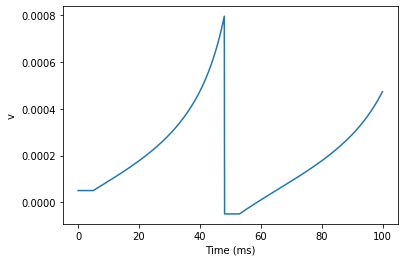

In [80]:
#Quadratic LIF 
# ---- Checking Effective threshold ---- #
# can see that the effective threshold decreases when the difference between u_rest and u_c is small (keeping other parameters the same) #
start_scope()
tau = 10*ms
a = 1/(mV)
step_current = input_factory.get_step_current(
    t_start=5, t_end=100, unit_time=ms,
    amplitude= 0.008*namp)
v_rest = 0.05*mV
v_c = 0.055*mV
res = 10*Mohm
eqs = '''
dv/dt = ((v- v_rest)*quad + res*step_current(t,i))/tau : volt (unless refractory)
quad = a*(v- v_c) : 1 
'''
G = NeuronGroup(1, eqs, threshold='v > 0.8 * mV', reset='v = -0.05 *mV', refractory=5*ms, method='rk2')
G.v = v_rest

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G) 
run(0.1*second)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');
print('Spike times: %s' % spikemon.t[:])

### Observations:
- Increase in the constant $a_{o}$ increases the chances of the model spiking. This happens because it multiplies with the other part of the equation and only increases the final voltage. This increases the chances of the voltage crossing the threshold voltage. 
- When $u_{c}$ is closer to $u_{rest}$ it increases the chances of the model spiking cause this reduces the 'effective threshold'. This can be seen by the minumum current needed for the for the model to spike. When $u_{c}$ is 0.055 mV $I_{min}$ is 0.008 nano amps, when $u_{c}$ is 0.08 mV I_{min} is 0.02 nano amps and when $u_{c}$ is 1mV  $I_{min}$ is 0.008 nano amps.  
- The shape of curves of the both of spiking models (Linear LIF and Quadratic LIF) are strikingly different eventhough the input is the same.  

## Ramp Current as Input 

We set the value of the amplitude to be 0.1 nano amps to get reasonable results and the slow_ramp_t to be 100 ms.
### Quadratic LIF 
#### Effect of u_c:

Spike times: [57.5 78.4 95. ] ms


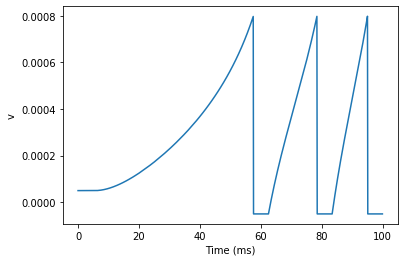

In [96]:
#Quadratic LIF 
# ---- Checking with slow ramp current ---- #
start_scope()
tau = 10*ms
a = 1/(mV)
slow_ramp_t_end = 100
slow_ramp_current = input_factory.get_ramp_current(5, slow_ramp_t_end, ms, 0.*uA, 0.1*namp)
v_rest = 0.05*mV
v_c = 1*mV
res = 10*Mohm
eqs = '''
dv/dt = ((v- v_rest)*quad + res*slow_ramp_current(t,i))/tau : volt (unless refractory)
quad = a*(v- v_c) : 1 
'''
G = NeuronGroup(1, eqs, threshold='v > 0.8 * mV', reset='v = -0.05 *mV', refractory=5*ms, method='rk2')
G.v = v_rest

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G) 
run(0.1*second)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');
print('Spike times: %s' % spikemon.t[:])



We decrease the value of $u_{c}$ to 0.055 milli volts (close to $u_{rest}$) and run the simlution. 

Spike times: [36.3 56.1 72.1 86.1 98.9] ms


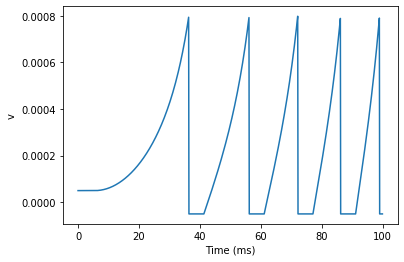

In [97]:
#Quadratic LIF 
# ---- Checking with slow ramp current ---- #
start_scope()
tau = 10*ms
a = 1/(mV)
slow_ramp_t_end = 100
slow_ramp_current = input_factory.get_ramp_current(5, slow_ramp_t_end, ms, 0.*uA, 0.1*namp)
v_rest = 0.05*mV
v_c = 0.055*mV
res = 10*Mohm
eqs = '''
dv/dt = ((v- v_rest)*quad + res*slow_ramp_current(t,i))/tau : volt (unless refractory)
quad = a*(v- v_c) : 1 
'''
G = NeuronGroup(1, eqs, threshold='v > 0.8 * mV', reset='v = -0.05 *mV', refractory=5*ms, method='rk2')
G.v = v_rest

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G) 
run(0.1*second)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');
print('Spike times: %s' % spikemon.t[:])

#### Effect of 'a':

We set the value of $a_{o}$ to 100/mV and run the simulation below

Spike times: [15.4 26.7 36.5 45.5 54.  62.2 70.1 77.8 85.3 92.7] ms


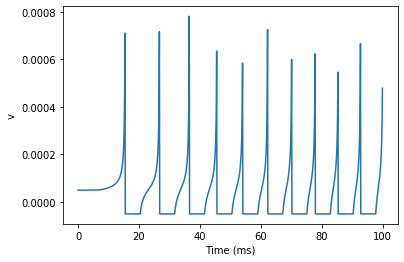

In [98]:
#Quadratic LIF 
# ---- Checking with slow ramp current ---- #
start_scope()
tau = 10*ms
a = 100/(mV)
slow_ramp_t_end = 100
slow_ramp_current = input_factory.get_ramp_current(5, slow_ramp_t_end, ms, 0.*uA, 0.1*namp)
v_rest = 0.05*mV
v_c = 0.06*mV
res = 10*Mohm
eqs = '''
dv/dt = ((v- v_rest)*quad + res*slow_ramp_current(t,i))/tau : volt (unless refractory)
quad = a*(v- v_c) : 1 
'''
G = NeuronGroup(1, eqs, threshold='v > 0.8 * mV', reset='v = -0.05 *mV', refractory=5*ms, method='rk2')
G.v = v_rest

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G) 
run(0.1*second)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');
print('Spike times: %s' % spikemon.t[:])

We decrease the value of $a_{o}$ and run the simulation 

Spike times: [43.1 64.  80.6 95.1] ms


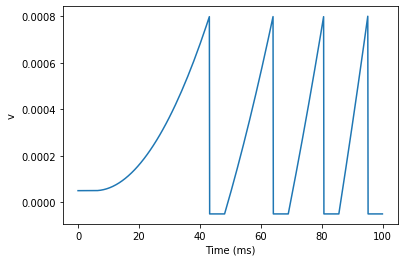

In [101]:
#Quadratic LIF 
# ---- Checking with slow ramp current ---- #
start_scope()
tau = 10*ms
a = 0.01/(mV)
slow_ramp_t_end = 100
slow_ramp_current = input_factory.get_ramp_current(5, slow_ramp_t_end, ms, 0.*uA, 0.1*namp)
v_rest = 0.05*mV
v_c = 0.06*mV
res = 10*Mohm
eqs = '''
dv/dt = ((v- v_rest)*quad + res*slow_ramp_current(t,i))/tau : volt (unless refractory)
quad = a*(v- v_c) : 1 
'''
G = NeuronGroup(1, eqs, threshold='v > 0.8 * mV', reset='v = -0.05 *mV', refractory=5*ms, method='rk2')
G.v = v_rest

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G) 
run(0.1*second)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');
print('Spike times: %s' % spikemon.t[:])

#### Effect of rampness of the current input 

We set ramp end time to be 1000 ms. So its a fast ramp. 

Spike times: [0.0856 0.1363 0.1761 0.2105 0.2415 0.27   0.2967 0.3219 0.3458 0.3687
 0.3907 0.412  0.4326 0.4526 0.4721 0.4911 0.5096 0.5277 0.5455 0.5629
 0.58   0.5968 0.6133 0.6295 0.6455 0.6613 0.6768 0.6921 0.7072 0.7222
 0.737  0.7516 0.766  0.7803 0.7944 0.8084 0.8223 0.836  0.8496 0.8631
 0.8765 0.8898 0.9029 0.9159 0.9288 0.9416 0.9544 0.9671 0.9797 0.9922] s


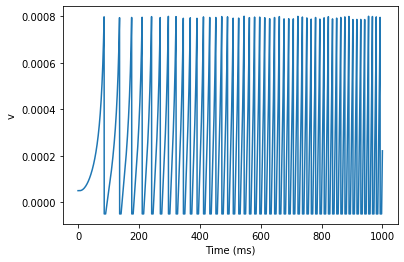

In [119]:
#Quadratic LIF 
# ---- Checking with slow ramp current ---- #
start_scope()
tau = 10*ms
a = 1/(mV)
slow_ramp_t_end = 1000
slow_ramp_current = input_factory.get_ramp_current(5, slow_ramp_t_end, ms, 0.*uA, 0.1*namp)
v_rest = 0.05*mV
v_c = 0.06*mV
res = 10*Mohm
eqs = '''
dv/dt = ((v- v_rest)*quad + res*slow_ramp_current(t,i))/tau : volt (unless refractory)
quad = a*(v- v_c) : 1 
'''
G = NeuronGroup(1, eqs, threshold='v > 0.8 * mV', reset='v = -0.05 *mV', refractory=5*ms, method='rk2')
G.v = v_rest

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G) 
run(1*second)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');
print('Spike times: %s' % spikemon.t[:])

We set the ramp end time to be 10ms. So its a slow ramp 

Spike times: [8.9] ms


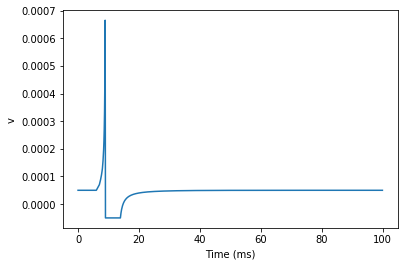

In [105]:
#Quadratic LIF 
# ---- Checking with fast ramp current ---- #
start_scope()
tau = 10*ms
a = 100/(mV)
fast_ramp_t_end = 10
fast_ramp_current = input_factory.get_ramp_current(5, fast_ramp_t_end, ms, 0.*uA, 0.1*namp)
v_rest = 0.05*mV
v_c = 0.06*mV
res = 10*Mohm
eqs = '''
dv/dt = ((v- v_rest)*quad + res*fast_ramp_current(t,i))/tau : volt (unless refractory)
quad = a*(v- v_c) : 1 
'''
G = NeuronGroup(1, eqs, threshold='v > 0.8 * mV', reset='v = -0.05 *mV', refractory=5*ms, method='rk2')
G.v = v_rest

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G) 
run(0.1*second)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');
print('Spike times: %s' % spikemon.t[:])

### Linear LIF 

Spike times: [86.7] ms


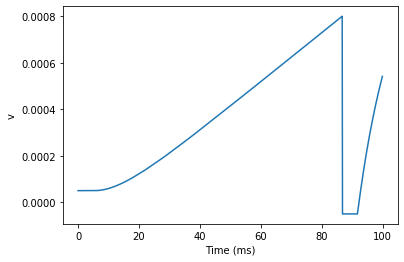

In [115]:
#Linear LIF 
## -- How will linear behave with slow ramp current -- ##
start_scope()
tau = 10*ms
a = 1/(mV)
slow_ramp_t_end = 100  
slow_ramp_current = input_factory.get_ramp_current(5, slow_ramp_t_end, ms, 0.*uA, 0.1*namp)
v_rest = 0.05*mV
v_c = 0.055*mV
res = 10*Mohm
eqs = '''
dv/dt = -((v - v_rest) - res*slow_ramp_current(t,i))/tau : volt (unless refractory)
'''
G = NeuronGroup(1, eqs, threshold='v > 0.8 * mV', reset='v = -0.05 *mV', refractory=5*ms, method='rk2')
G.v = v_rest

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G) 
run(0.1*second)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');
print('Spike times: %s' % spikemon.t[:])

#### Effect of rampness of the input 
We set ramp end time to 1000 ms. So its a fast ramp input 

Spike times: [0.7617 0.7982 0.8289 0.8565 0.8821 0.9061 0.9289 0.9507 0.9716 0.9918] s


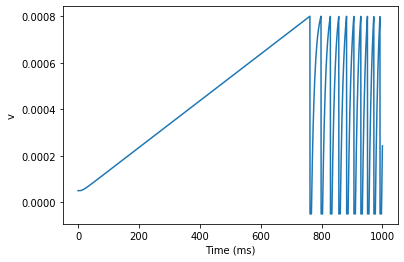

In [117]:
#Linear LIF 
## -- How will linear behave with slow ramp current -- ##
start_scope()
tau = 10*ms
a = 1/(mV)
slow_ramp_t_end = 1000  
slow_ramp_current = input_factory.get_ramp_current(5, slow_ramp_t_end, ms, 0.*uA, 0.1*namp)
v_rest = 0.05*mV
v_c = 0.055*mV
res = 10*Mohm
eqs = '''
dv/dt = -((v- v_rest) - res*slow_ramp_current(t,i))/tau : volt (unless refractory)
'''
G = NeuronGroup(1, eqs, threshold='v > 0.8 * mV', reset='v = -0.05 *mV', refractory=5*ms, method='rk2')
G.v = v_rest

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G) 
run(1*second)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');
print('Spike times: %s' % spikemon.t[:])

We set the ramp end time to 10ms. So its a slow ramp. 

Spike times: [] s


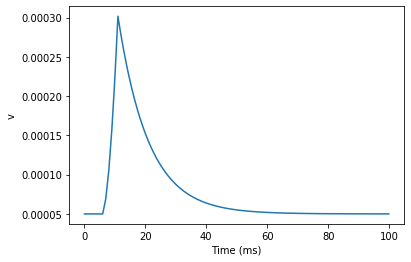

In [118]:
#Linear LIF 
## -- How will linear behave with fast ramp current -- ##
start_scope()
tau = 10*ms
a = 1/(mV)
slow_ramp_t_end = 10  
slow_ramp_current = input_factory.get_ramp_current(5, slow_ramp_t_end, ms, 0.*uA, 0.1*namp)
v_rest = 0.05*mV
v_c = 0.055*mV
res = 10*Mohm
eqs = '''
dv/dt = -((v- v_rest) - res*slow_ramp_current(t,i))/tau : volt (unless refractory)
'''
G = NeuronGroup(1, eqs, threshold='v > 0.8 * mV', reset='v = -0.05 *mV', refractory=5*ms, method='rk2')
G.v = v_rest

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G) 
run(0.1*second)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');
print('Spike times: %s' % spikemon.t[:])

### Observations:
- Increasing the rampness of the input current increases the chances for the model to spike. This is valid for both QLIF and and LLIF 
- Like before, increasing the value of $a_{o}$ increases the chances of the model to spike and decreasing the difference between $u_{c}$ and $u_{rest}$ increases the chances for the model to spike 

## Sinusoidal Current as Input 

### Quadratic LIF 
We set frequency of the sinusoidal input to 250 Hz and amplitude to 0.5 nano amps

Spike times: [19.9 62.9] ms


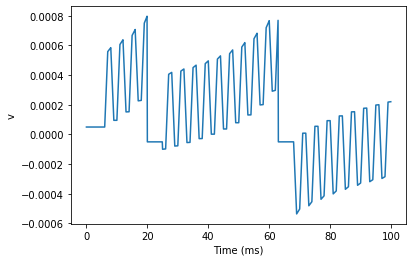

In [145]:
#Quadratic LIF with sinusoidal input
start_scope()
tau = 10*ms
a = 1/(mV)
sinusoidal_current = input_factory.get_sinusoidal_current(5, 100, unit_time=1 * ms,
                                            amplitude= 0.5 * namp, frequency=250*Hz,
                                            direct_current=0. * namp)


v_rest = 0.05*mV
v_c = 0.06*mV
res = 10*Mohm
eqs = '''
dv/dt = ((v- v_rest)*quad + res*sinusoidal_current(t,i))/tau : volt (unless refractory)
quad = a*(v- v_c) : 1 
'''
G = NeuronGroup(1, eqs, threshold='v > 0.8 * mV', reset='v = -0.05 *mV', refractory=5*ms, method='rk2')
G.v = v_rest

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G) 
run(0.1*second)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');
print('Spike times: %s' % spikemon.t[:])

#### Effect of frequency of the sinusoidal input

We set the frequency to 600 Hz 

Spike times: [] s


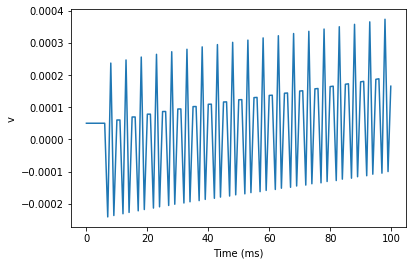

In [146]:
#Quadratic LIF with sinusoidal input
## Talk about 300 Hz input. Its peculiar ## 
start_scope()
tau = 10*ms
a = 1/(mV)
sinusoidal_current = input_factory.get_sinusoidal_current(5, 100, unit_time=1 * ms,
                                            amplitude= 0.5 * namp, frequency=600*Hz,
                                            direct_current=0. * namp)


v_rest = 0.05*mV
v_c = 0.06*mV
res = 10*Mohm
eqs = '''
dv/dt = ((v- v_rest)*quad + res*sinusoidal_current(t,i))/tau : volt (unless refractory)
quad = a*(v- v_c) : 1 
'''
G = NeuronGroup(1, eqs, threshold='v > 0.8 * mV', reset='v = -0.05 *mV', refractory=5*ms, method='rk2')
G.v = v_rest

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G) 
run(0.1*second)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');
print('Spike times: %s' % spikemon.t[:])

We set the frequency to 100 Hz 

Spike times: [ 7.9 19.6 28.3 39.3 48.5 59.  68.6 78.9 88.7 98.9] ms


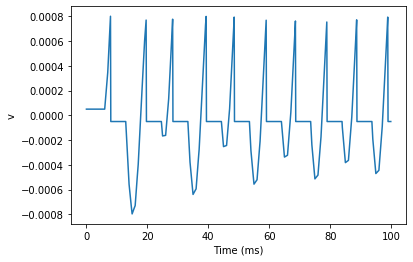

In [147]:
#Quadratic LIF with sinusoidal input
## Talk about 300 Hz input. Its peculiar ## 
start_scope()
tau = 10*ms
a = 1/(mV)
sinusoidal_current = input_factory.get_sinusoidal_current(5, 100, unit_time=1 * ms,
                                            amplitude= 0.5 * namp, frequency=100*Hz,
                                            direct_current=0. * namp)


v_rest = 0.05*mV
v_c = 0.06*mV
res = 10*Mohm
eqs = '''
dv/dt = ((v- v_rest)*quad + res*sinusoidal_current(t,i))/tau : volt (unless refractory)
quad = a*(v- v_c) : 1 
'''
G = NeuronGroup(1, eqs, threshold='v > 0.8 * mV', reset='v = -0.05 *mV', refractory=5*ms, method='rk2')
G.v = v_rest

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G) 
run(0.1*second)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');
print('Spike times: %s' % spikemon.t[:])

#### Effect of a:

We increase the value of $a_{o}$ to 100/(mV)

Spike times: [ 6.6 14.7 22.7 30.7 38.7 46.7 54.7 62.7 70.7 78.7 86.7 94.7] ms


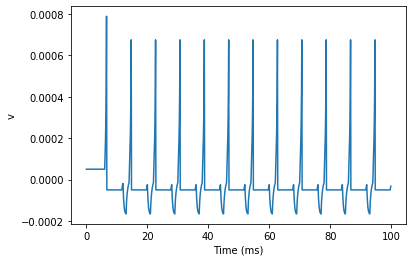

In [148]:
#Quadratic LIF with sinusoidal input
start_scope()
tau = 10*ms
a = 100/(mV)
sinusoidal_current = input_factory.get_sinusoidal_current(5, 100, unit_time=1 * ms,
                                            amplitude= 0.5 * namp, frequency=250*Hz,
                                            direct_current=0. * namp)


v_rest = 0.05*mV
v_c = 0.06*mV
res = 10*Mohm
eqs = '''
dv/dt = ((v- v_rest)*quad + res*sinusoidal_current(t,i))/tau : volt (unless refractory)
quad = a*(v- v_c) : 1 
'''
G = NeuronGroup(1, eqs, threshold='v > 0.8 * mV', reset='v = -0.05 *mV', refractory=5*ms, method='rk2')
G.v = v_rest

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G) 
run(0.1*second)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');
print('Spike times: %s' % spikemon.t[:])

Spike times: [] s


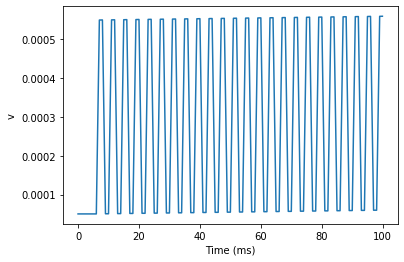

In [149]:
#Quadratic LIF with sinusoidal input
start_scope()
tau = 10*ms
a = 0.01/(mV)
sinusoidal_current = input_factory.get_sinusoidal_current(5, 100, unit_time=1 * ms,
                                            amplitude= 0.5 * namp, frequency=250*Hz,
                                            direct_current=0. * namp)


v_rest = 0.05*mV
v_c = 0.06*mV
res = 10*Mohm
eqs = '''
dv/dt = ((v- v_rest)*quad + res*sinusoidal_current(t,i))/tau : volt (unless refractory)
quad = a*(v- v_c) : 1 
'''
G = NeuronGroup(1, eqs, threshold='v > 0.8 * mV', reset='v = -0.05 *mV', refractory=5*ms, method='rk2')
G.v = v_rest

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G) 
run(0.1*second)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');
print('Spike times: %s' % spikemon.t[:])

#### Effect of u_c:

We increase the value of $u_{c}$ to 1mV and run the simluation 

Spike times: [] s


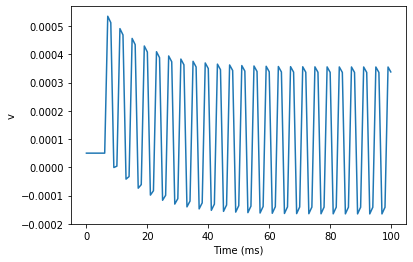

In [150]:
#Quadratic LIF with sinusoidal input
start_scope()
tau = 10*ms
a = 1/(mV)
sinusoidal_current = input_factory.get_sinusoidal_current(5, 100, unit_time=1 * ms,
                                            amplitude= 0.5 * namp, frequency=250*Hz,
                                            direct_current=0. * namp)


v_rest = 0.05*mV
v_c = 1*mV
res = 10*Mohm
eqs = '''
dv/dt = ((v- v_rest)*quad + res*sinusoidal_current(t,i))/tau : volt (unless refractory)
quad = a*(v- v_c) : 1 
'''
G = NeuronGroup(1, eqs, threshold='v > 0.8 * mV', reset='v = -0.05 *mV', refractory=5*ms, method='rk2')
G.v = v_rest

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G) 
run(0.1*second)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');
print('Spike times: %s' % spikemon.t[:])

We decrease $u_{c}$ value to 0.055 milli volts. 

Spike times: [19.8 71.5] ms


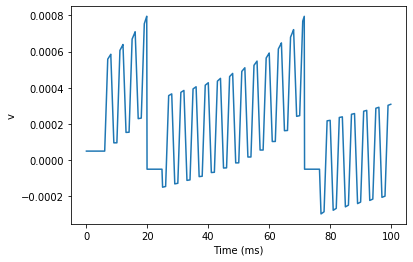

In [152]:
#Quadratic LIF with sinusoidal input
start_scope()
tau = 10*ms
a = 1/(mV)
sinusoidal_current = input_factory.get_sinusoidal_current(5, 100, unit_time=1 * ms,
                                            amplitude= 0.5 * namp, frequency=250*Hz,
                                            direct_current=0. * namp)


v_rest = 0.05*mV
v_c = 0.055*mV
res = 10*Mohm
eqs = '''
dv/dt = ((v- v_rest)*quad + res*sinusoidal_current(t,i))/tau : volt (unless refractory)
quad = a*(v- v_c) : 1 
'''
G = NeuronGroup(1, eqs, threshold='v > 0.8 * mV', reset='v = -0.05 *mV', refractory=5*ms, method='rk2')
G.v = v_rest

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G) 
run(0.1*second)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');
print('Spike times: %s' % spikemon.t[:])

### Linear LIF 

Spike times: [] s


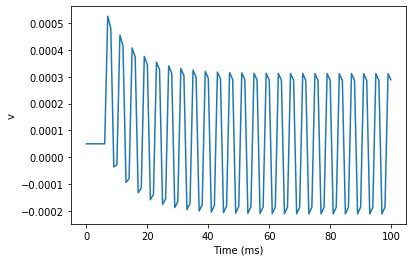

In [120]:
#Linear LIF 
## -- How will linear behave with sinusoidal current -- ##
start_scope()
tau = 10*ms
a = 1/(mV)
sinusoidal_current = input_factory.get_sinusoidal_current(5, 100, unit_time=1 * ms,
                                            amplitude= 0.5 * namp, frequency=250*Hz,
                                            direct_current=0. * namp)
v_rest = 0.05*mV
v_c = 0.055*mV
res = 10*Mohm
eqs = '''
dv/dt = -((v- v_rest) - res*sinusoidal_current(t,i))/tau : volt (unless refractory)
'''
G = NeuronGroup(1, eqs, threshold='v > 0.8 * mV', reset='v = -0.05 *mV', refractory=5*ms, method='rk2')
G.v = v_rest

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G) 
run(0.1*second)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');
print('Spike times: %s' % spikemon.t[:])

#### Effect of frequency of the sinusoidal input 

We increase the value of frequency of the sinusoidal input to 600 Hz 

Spike times: [] s


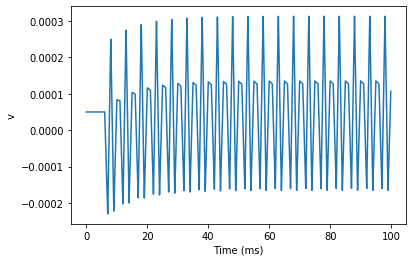

In [153]:
#Linear LIF 
## -- How will linear behave with sinusoidal current -- ##
start_scope()
tau = 10*ms
a = 1/(mV)
sinusoidal_current = input_factory.get_sinusoidal_current(5, 100, unit_time=1 * ms,
                                            amplitude= 0.5 * namp, frequency=600*Hz,
                                            direct_current=0. * namp)
v_rest = 0.05*mV
v_c = 0.055*mV
res = 10*Mohm
eqs = '''
dv/dt = -((v- v_rest) - res*sinusoidal_current(t,i))/tau : volt (unless refractory)
'''
G = NeuronGroup(1, eqs, threshold='v > 0.8 * mV', reset='v = -0.05 *mV', refractory=5*ms, method='rk2')
G.v = v_rest

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G) 
run(0.1*second)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');
print('Spike times: %s' % spikemon.t[:])

We decrease the value of frequency of the sinusoidal input to 100 Hz 

Spike times: [ 8.1 19.6 28.4 39.3 48.6 59.  68.7 78.9 88.8 98.9] ms


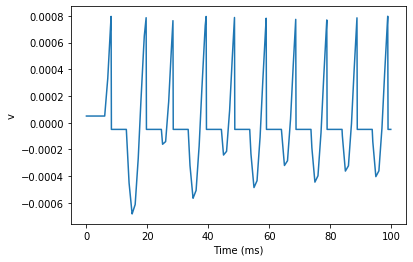

In [154]:
#Linear LIF 
## -- How will linear behave with sinusoidal current -- ##
start_scope()
tau = 10*ms
a = 1/(mV)
sinusoidal_current = input_factory.get_sinusoidal_current(5, 100, unit_time=1 * ms,
                                            amplitude= 0.5 * namp, frequency=100*Hz,
                                            direct_current=0. * namp)
v_rest = 0.05*mV
v_c = 0.055*mV
res = 10*Mohm
eqs = '''
dv/dt = -((v- v_rest) - res*sinusoidal_current(t,i))/tau : volt (unless refractory)
'''
G = NeuronGroup(1, eqs, threshold='v > 0.8 * mV', reset='v = -0.05 *mV', refractory=5*ms, method='rk2')
G.v = v_rest

M = StateMonitor(G, 'v', record=0)
spikemon = SpikeMonitor(G) 
run(0.1*second)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');
print('Spike times: %s' % spikemon.t[:])

### Observations 
- Decreasing the frequency of the sinusoidal input of current increases the chances of the model spiking. This is applicable to both QLIF and LLIF  
    - Although this is not always consistent. For example, 300 Hz input gives more spikes than 250 Hz input. 
- Like the previous modes of input, it is clear that the when $a_{o}$ increases then the model spikes more and when the difference between $u_{c}$ and $u_{rest}$ is less the model spikes more easily cause the 'effective' threshold decreases.  